In [1]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#1 准备数据
#定义当前目录
os.chdir(r'./')
work_path = os.getcwd()
#第六章节提取的植被指数、纹理特征和波段数据用于本章的建模数据
file_path = os.path.join(work_path,'使用数据','variable_GF2.csv')
#初始化数据集
data = pd.read_csv(file_path,engine = 'python')
#查看数据
data.head()

#2 分割数据
#定义训练数据和测试数据
x = data.iloc[:,1:]
y = data['AGB']
#划分训练集与测试集，随机采样25%作为测试 75%作为训练
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

#3 在训练前标准化训练集与测试集
ss_x = StandardScaler().fit(x_train)
x_train = ss_x.transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train = ss_y.transform(y_train.values.reshape(-1, 1))
y_test = ss_y.transform(y_test.values.reshape(-1, 1))

线性回归的默认评估值为： -1.6157448114315982
线性回归的R_squared值为： -1.6157448114315982
线性回归的均方误差为: 7370.259388542501
线性回归的平均绝对误差为: 63.298072200668884


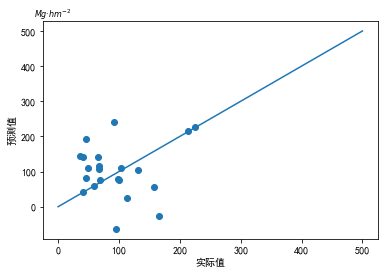

In [5]:
"""
线性回归
"""
#定义线性回归模型
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)

#5 模型评估
#计算模型评估参数
'''线性回归的默认评估值'''
acc = lr.score(x_test,y_test)
'''线性回归的R_squared值'''
y_predict = lr.predict(x_test)
r2 = r2_score(y_test, y_predict)
'''线性回归的均方误差'''
mean_squared_error_value = mean_squared_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
'''线性回归的平均绝对误差'''
mean_absolute_error_value = mean_absolute_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
print("线性回归的默认评估值为：",acc)
print("线性回归的R_squared值为：",r2)
print("线性回归的均方误差为:", mean_squared_error_value)
print("线性回归的平均绝对误差为:",mean_absolute_error_value)

#显示结果
y = ss_y.inverse_transform(y_test)
pre_y = lr.predict(x_test)
pre_y = ss_y.inverse_transform(pre_y)
data = pd.DataFrame(np.column_stack([y,pre_y]),columns=['original','predict'])

original= data['original']
predict = data['predict']
plt.scatter(original, predict)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.text(x = -40 ,y = 540 , s = r'$Mg·hm^{-2}$',size=8)
plt.plot([500,0],[500,0])
# plt.savefig(r'g:\python林业资源\出图/回归线性.png',dpi=300)

平均k近邻回归的默认评估值为： 0.16740205847801137
平均k近邻回归的R_squared值为： 0.16740205847801137
平均k近邻回归的均方误差为: 2345.9715063049703
平均k近邻回归 的平均绝对误差为: 36.93275686477273


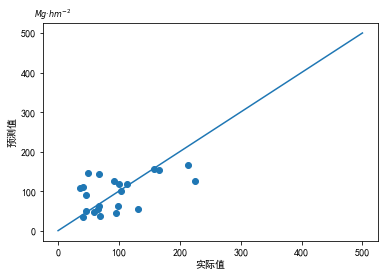

In [6]:
"""
KNN回归
"""

#定义KNN回归模型
uni_knr = KNeighborsRegressor(n_neighbors=2)
uni_knr.fit(x_train, y_train.ravel())
#预测
uni_knr_predict = uni_knr.predict(x_test)
# 5 模型评估
# 平均k近邻回归 模型评估
print("平均k近邻回归的默认评估值为：", uni_knr.score(x_test, y_test))
print("平均k近邻回归的R_squared值为：", r2_score(y_test, uni_knr_predict))
print("平均k近邻回归的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),
                                              ss_y.inverse_transform(uni_knr_predict)))
print("平均k近邻回归 的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),
                                                 ss_y.inverse_transform(uni_knr_predict)))
#显示结果
y = ss_y.inverse_transform(y_test)
pre_y = uni_knr.predict(x_test)
pre_y = ss_y.inverse_transform(pre_y)
data = pd.DataFrame(np.column_stack([y,pre_y]),columns=['original','predict'])
original= data['original']
predict = data['predict']
plt.scatter(original, predict)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.text(x = -40 ,y = 540 , s = r'$Mg·hm^{-2}$',size=8)
plt.plot([500,0],[500,0])

回归树的默认评估值为： -0.4181586483806594
平回归树的R_squared值为： -0.4181586483806594
回归树的均方误差为: 3995.877979759734
回归树的平均绝对误差为: 45.73905512318182


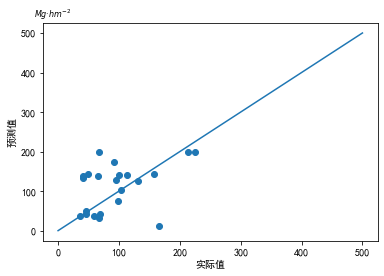

In [8]:
"""
决策树回归
"""

#定义决策树回归模型
dtr = DecisionTreeRegressor()
#训练
dtr.fit(x_train, y_train)
# 预测 保存预测结果
dtr_y_predict = dtr.predict(x_test)
#5 模型评估
print("回归树的默认评估值为：", dtr.score(x_test, y_test))
print("平回归树的R_squared值为：", r2_score(y_test, dtr_y_predict))
print("回归树的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),
                                           ss_y.inverse_transform(dtr_y_predict)))
print("回归树的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),
                                                ss_y.inverse_transform(dtr_y_predict)))

#显示预测结果
y = ss_y.inverse_transform(y_test)
pre_y = dtr.predict(x_test)
pre_y = ss_y.inverse_transform(pre_y)
data = pd.DataFrame(np.column_stack([y,pre_y]),columns=['original','predict'])
original= data['original']
predict = data['predict']
plt.scatter(original, predict)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.text(x = -40 ,y = 540 , s = r'$Mg·hm^{-2}$',size=8)
plt.plot([500,0],[500,0])

支持向量机的默认评估值为： -0.1814164670235141
支持向量机的R_squared值为： -0.1814164670235141
支持向量机的均方误差为: 3328.8208275536
支持向量机的平均绝对误差为: 46.60596635770607


C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


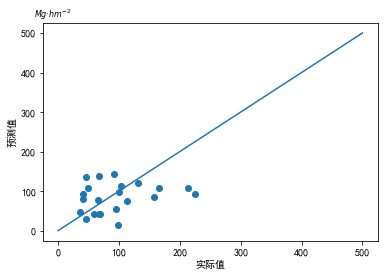

In [9]:
"""
svm回归
"""
#定义向量机回归模型
linear_svr=SVR(kernel='linear')
linear_svr.fit(x_train,y_train)
#5 模型评估
#计算模型评估参数
'''支持向量机的默认评估值'''
acc = linear_svr.score(x_test,y_test)
'''支持向量机的R_squared值'''
y_predict = linear_svr.predict(x_test)
r2 = r2_score(y_test, y_predict)
'''支持向量机的均方误差'''
mean_squared_error_value = mean_squared_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
'''支持向量机的平均绝对误差'''
mean_absolute_error_value = mean_absolute_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
print("支持向量机的默认评估值为：",acc)
print("支持向量机的R_squared值为：",r2)
print("支持向量机的均方误差为:", mean_squared_error_value)
print("支持向量机的平均绝对误差为:",mean_absolute_error_value)

#显示结果
y = ss_y.inverse_transform(y_test)
pre_y = linear_svr.predict(x_test)
pre_y = ss_y.inverse_transform(pre_y)
data = pd.DataFrame(np.column_stack([y,pre_y]),columns=['original','predict'])
data.to_csv('predict.csv')

original= data['original']
predict = data['predict']
plt.scatter(original, predict)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.text(x = -40 ,y = 540 , s = r'$Mg·hm^{-2}$',size=8)
plt.plot([500,0],[500,0])


C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


随机森林回归的默认评估值为： 0.3233735571717624
随机森林回归的R_squared值为： 0.3233735571717624
随机森林回归的均方误差为: 1906.4980540137606
随机森林回归的平均绝对误差为: 34.2843916687177


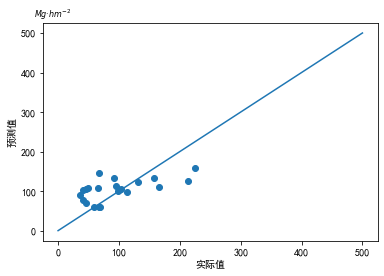

In [10]:
"""
随机森林回归
"""
rfr = RandomForestRegressor(n_estimators=3000)
rfr.fit(x_train,y_train)
importances=rfr.feature_importances_

#5 模型评估
#计算模型评估参数
'''随机森林回归的默认评估值'''
acc = rfr.score(x_test,y_test)
'''随机森林回归的R_squared值'''
y_predict = rfr.predict(x_test)
r2 = r2_score(y_test, y_predict)
'''随机森林回归的均方误差'''
mean_squared_error_value = mean_squared_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
'''随机森林回归的平均绝对误差'''
mean_absolute_error_value = mean_absolute_error(
ss_y.inverse_transform(y_test),
ss_y.inverse_transform(y_predict))
print("随机森林回归的默认评估值为：",acc)
print("随机森林回归的R_squared值为：",r2)
print("随机森林回归的均方误差为:", mean_squared_error_value)
print("随机森林回归的平均绝对误差为:",mean_absolute_error_value)

#显示结果
y = ss_y.inverse_transform(y_test)
pre_y = rfr.predict(x_test)
pre_y = ss_y.inverse_transform(pre_y)
data = pd.DataFrame(np.column_stack([y,pre_y]),columns=['original','predict'])

original= data['original']
predict = data['predict']
plt.scatter(original, predict)
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.text(x = -40 ,y = 540 , s = r'$Mg·hm^{-2}$',size=8)
plt.plot([500,0],[500,0])